In [52]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv("C:/Users/1625203/Desktop/ML Case Study/heart-diseases-classification/heart_2020_cleaned.csv")

# Basic info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
df.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [5]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


# Data preprocessing

## Handling missing values

In [6]:
sum(df.isna().sum()) + sum(df.isnull().sum())  # no missing values, clear data

0

## Get rid of duplicates

In [7]:
print(df.shape[0] - df.drop_duplicates().shape[0])  # 18078 duplicates to drop
df = df.drop_duplicates()

18078


## Normalization

### prepare 'Diabetic' column

In [8]:
df['Diabetic'] = df.Diabetic.apply(lambda x: 'No' if x == 'No, borderline diabetes' else x)
df['Diabetic'] = df.Diabetic.apply(lambda x: 'Yes' if x == 'Yes (during pregnancy)' else x)

### change yes/no columns to 1/0

In [9]:
yes_no = [col for col in df.columns if sorted(list(df[col].unique())) == ['No', 'Yes']]
print(*yes_no, sep=', ')
 
label_encoder = LabelEncoder()
for col in yes_no:
    df[col] = label_encoder.fit_transform(df[col])


HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Diabetic, PhysicalActivity, Asthma, KidneyDisease, SkinCancer


### normalize columns with MinMaxMethod

In [10]:
numerical = ['PhysicalHealth', 'MentalHealth']  # BMI и SleepTime думаю не стоит
for col in numerical:
    # df[col] = df[col] / np.sum(df[col])
    # df[col] = df[col] / np.max(df[col])
    df[col] = (df[col] - np.min(df[col])) / (np.max(df[col]) - np.min(df[col]))

In [11]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,0.100000,1.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.000000,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,0.666667,1.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.000000,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,0.933333,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


# First look

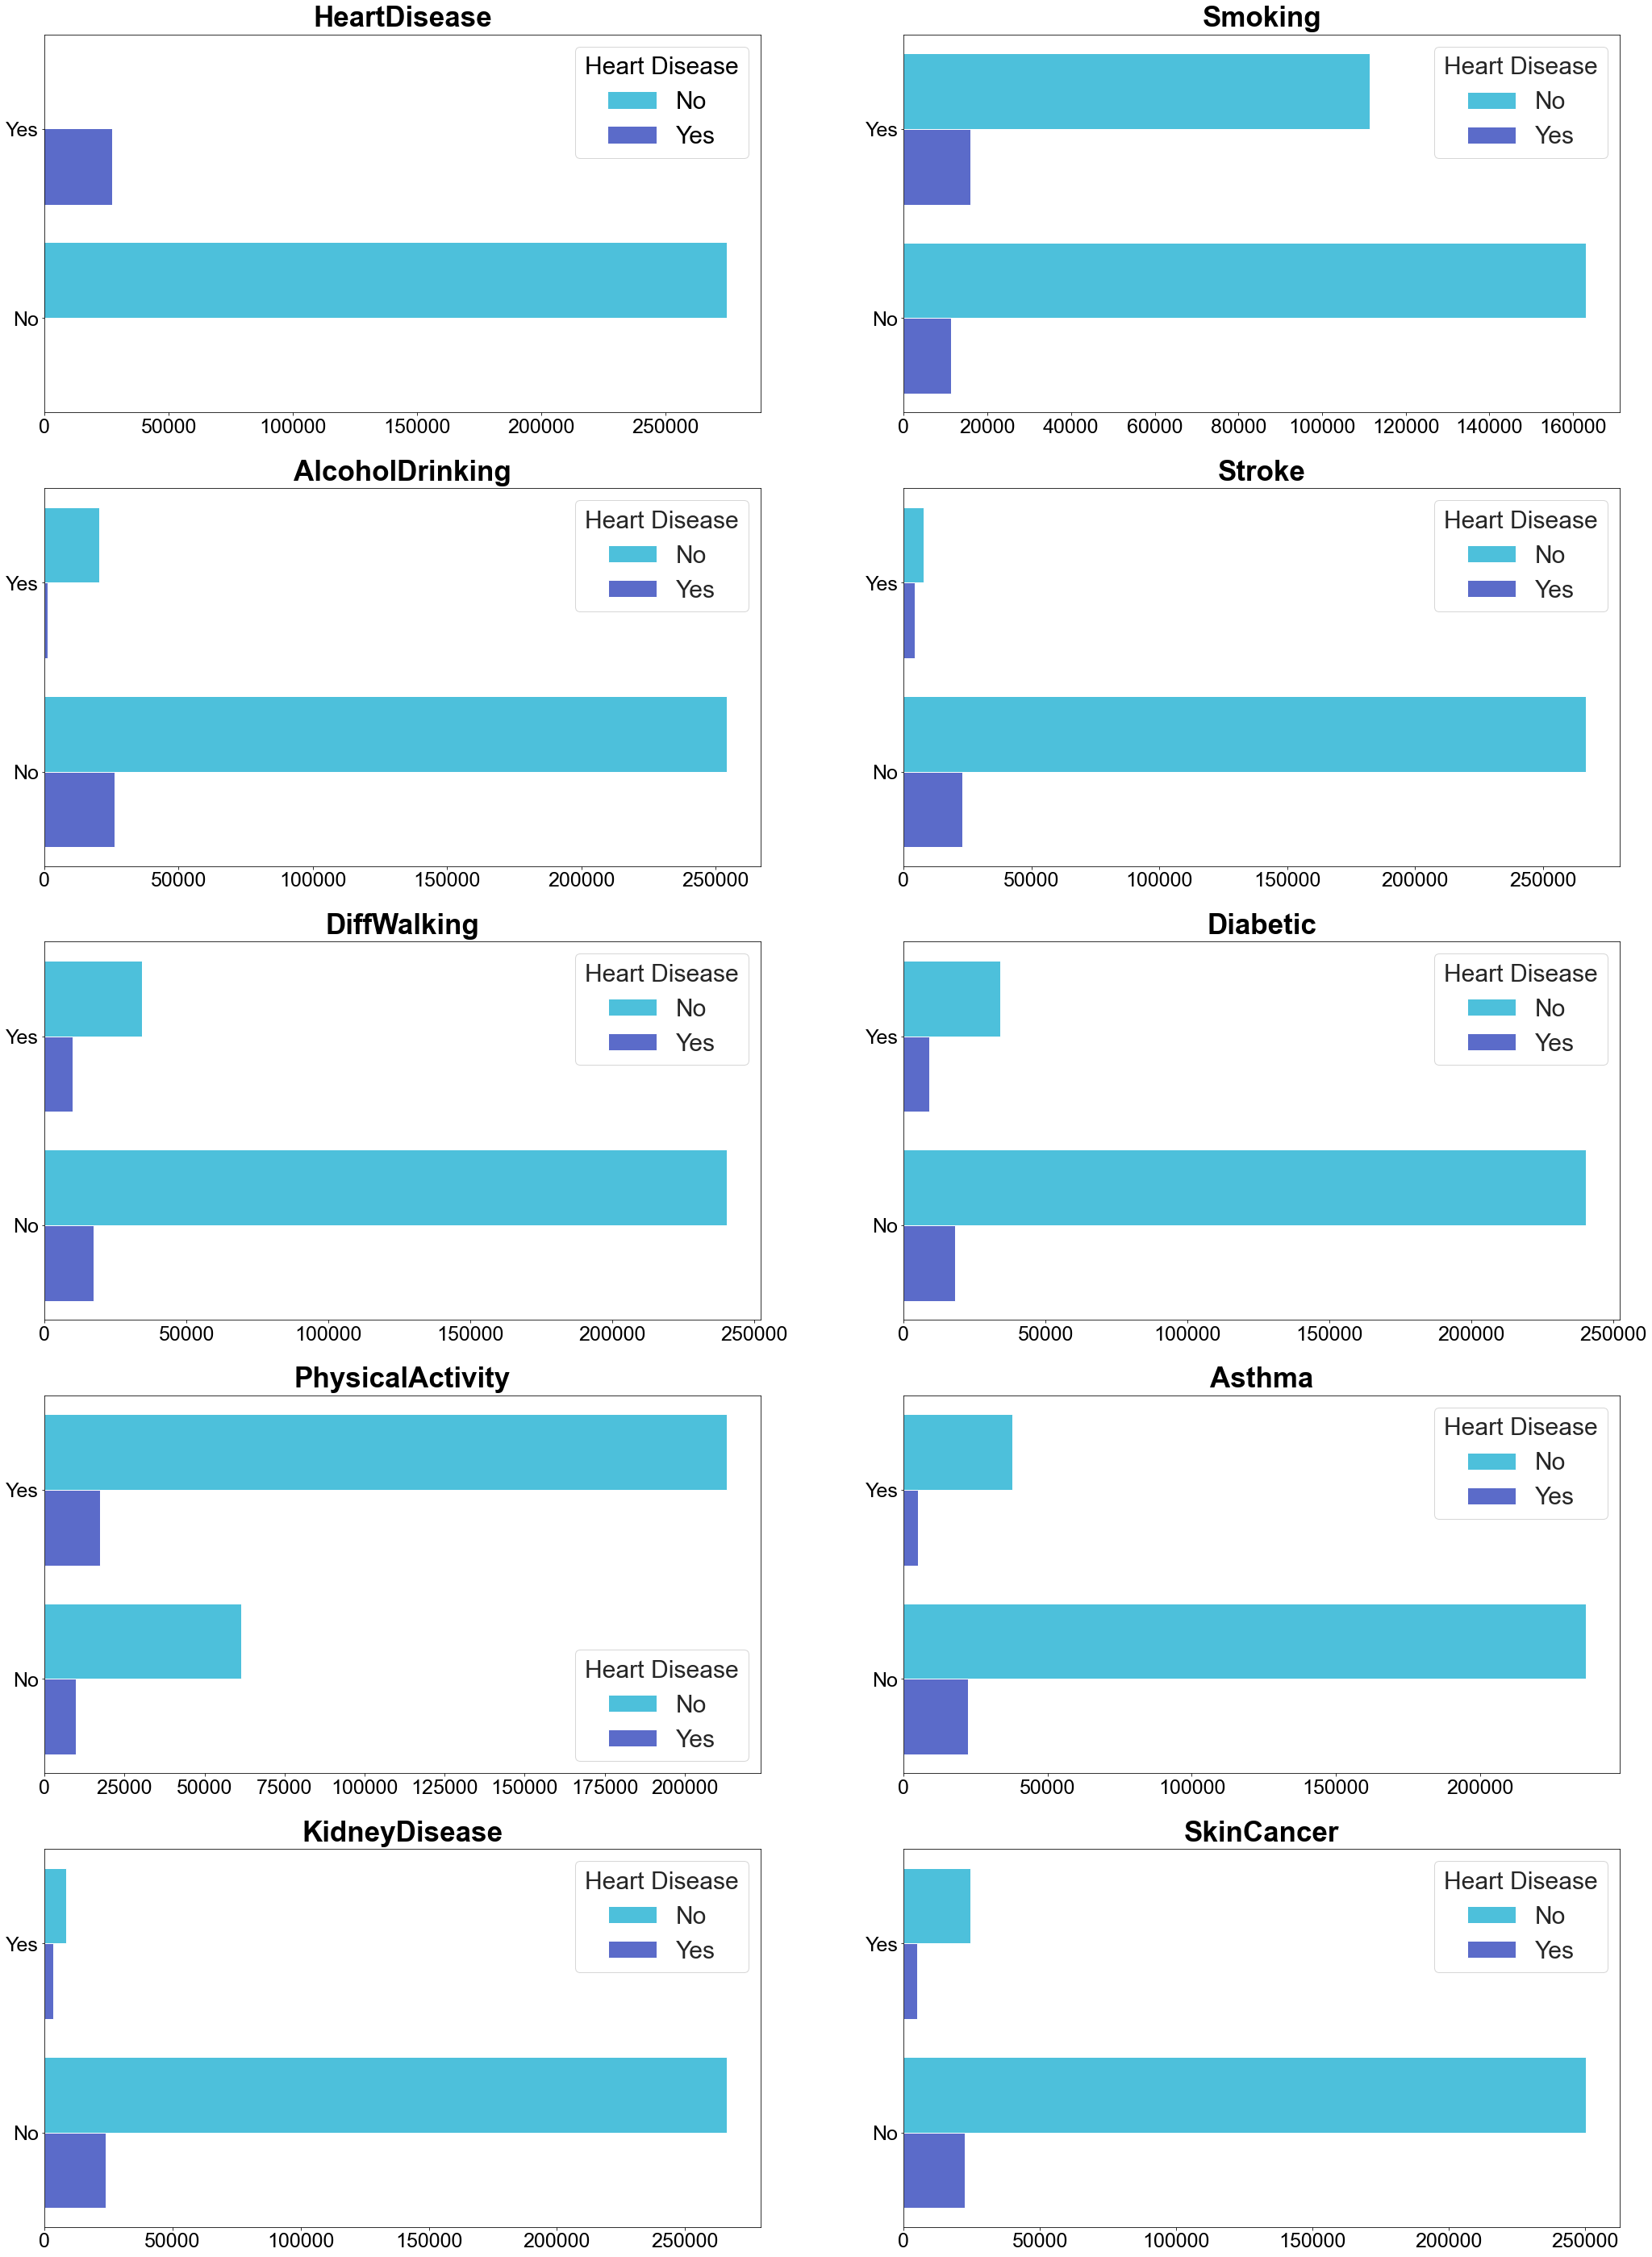

In [12]:
fig, axes = plt.subplots(5, 2, figsize=(35, 50))
idx = 0

for row in range(5):
    for col in range(2):
        sns.countplot(ax = axes[row, col], y = df[yes_no[idx]], hue = df['HeartDisease'], palette = ['#35CEF3', '#495EDB'],
                      order=[1, 0]).set(yticklabels = ['Yes', 'No'], ylabel = None, xlabel = None)
        axes[row, col].set_title(yes_no[idx], fontsize=35, fontweight ='bold', pad=10)
        axes[row, col].tick_params(axis='both', labelsize=25)
        axes[row, col].legend(title="Heart Disease", fontsize=30, title_fontsize=30, labels=['No', 'Yes'])
        idx += 1
        sns.set_style("ticks")

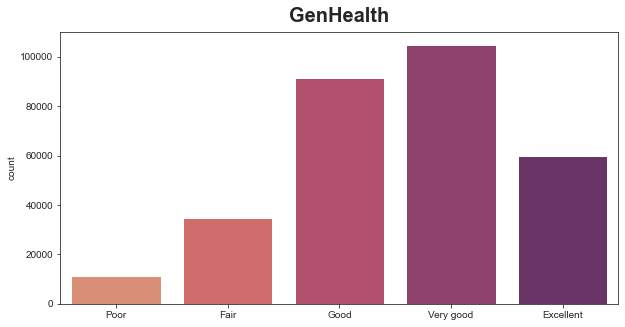

In [13]:
plt.figure(figsize=[10,5]) 
temp = sns.countplot(x=df['GenHealth'], order=('Poor', 'Fair', 'Good', 'Very good', 'Excellent'), palette = "flare")
temp.set_title('GenHealth', fontsize=20, pad=10, fontweight ='bold')
temp.set(xlabel=None)
sns.set_style("ticks")

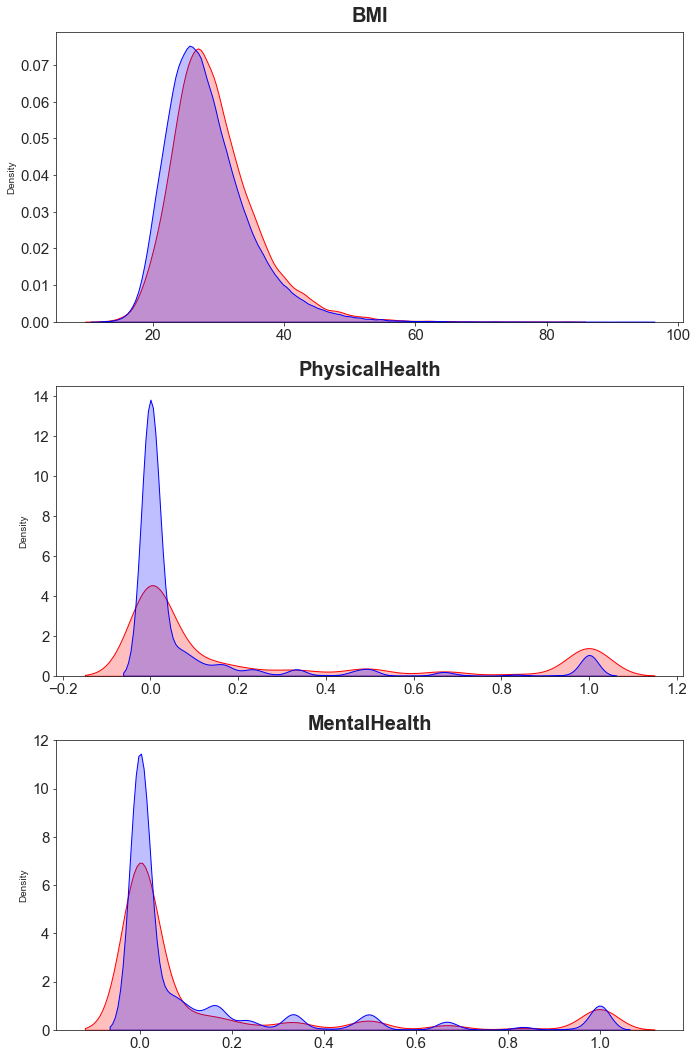

In [14]:
cols = ['BMI', 'PhysicalHealth', 'MentalHealth']
fig, axes = plt.subplots(3, figsize=(10, 15))
idx = 0

for col in cols:
    sns.set(font_scale = 1.5)
    sns.kdeplot(df[df['HeartDisease']==1][col], ax = axes[idx], shade=True,color='red')
    sns.kdeplot(df[df['HeartDisease']==0][col], ax = axes[idx], shade=True,color='blue')
    axes[idx].set_title(cols[idx], fontsize=20, fontweight='bold', pad=10)
    axes[idx].tick_params(axis='both', labelsize=15)
    axes[idx].set(xlabel=None)
    idx += 1
    sns.set_style("ticks")
fig.tight_layout(pad=1)

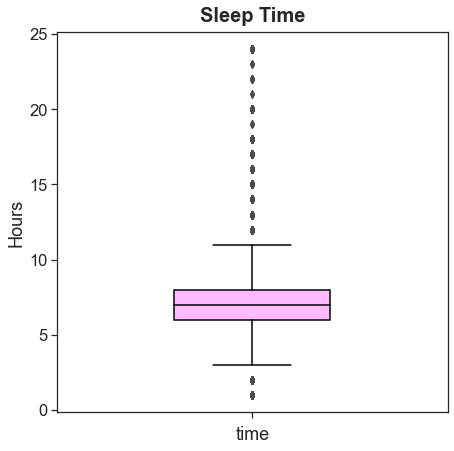

In [15]:
PROPS = {
    'boxprops':{'facecolor':'#FFBBFF', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

plt.figure(figsize=[7,7]) 
temp = sns.boxplot(y='SleepTime',data=df, width=0.4, **PROPS)
temp.set_title('Sleep Time', fontsize=20, fontweight='bold', pad=10)
temp.set(ylabel='Hours')
temp.set(xlabel='time')
sns.set_style("ticks")

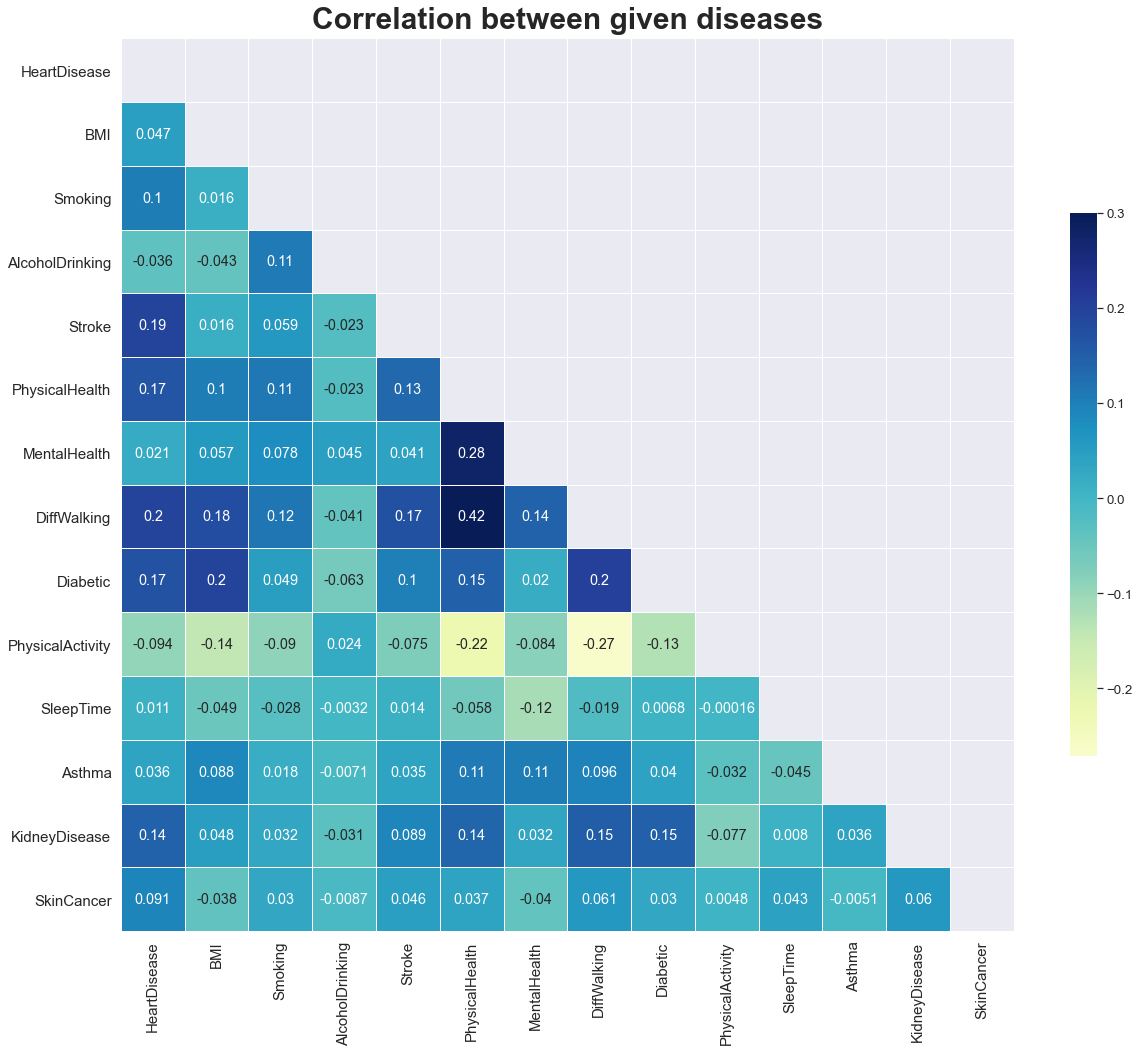

In [16]:
sns.set(font_scale = 1.2)
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap="YlGnBu", annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation between given diseases', fontsize=30, fontweight='bold', pad=10)
ax.tick_params(axis='both', labelsize=15)

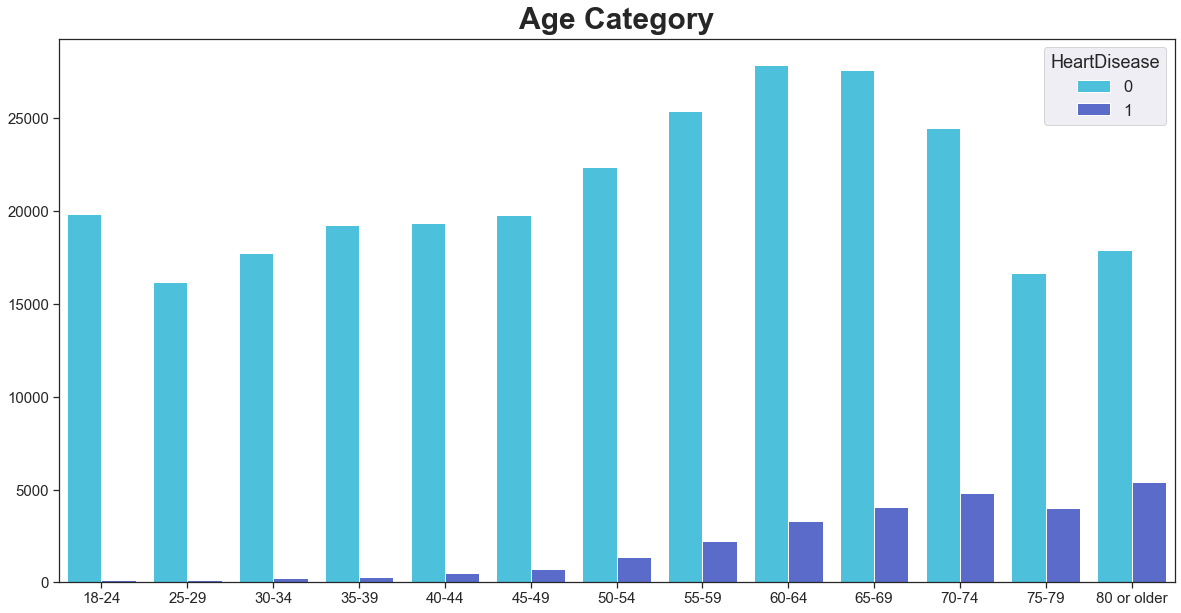

In [18]:
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 1.5)
temp = sns.countplot(x = df['AgeCategory'], hue = df['HeartDisease'], order = sorted(df['AgeCategory'].unique()), palette=['#35CEF3', '#495EDB'])
temp.set_title('Age Category', fontsize=30, fontweight='bold', pad=10)
temp.set(ylabel=None, xlabel=None)
ax.tick_params(axis='both', labelsize=15)
sns.set_style("ticks")

<ipython-input-19-cea707483b32>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.append(df[df['HeartDisease'] == 1][df['Race'] == i].count()[0] / df[df['Race'] == i].count()[0])


Text(0.5, 1.0, 'Percentage of a Heart Disease sufferers among given races')

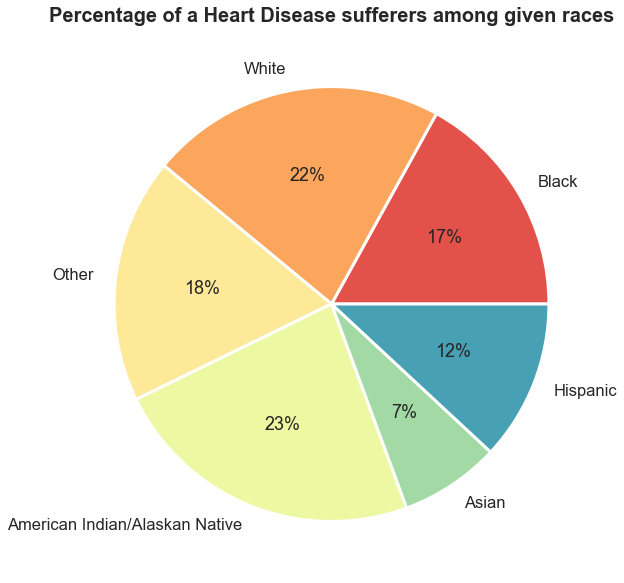

In [19]:
labels = list()
data = list()
for i in df[df['HeartDisease'] == 1]['Race'].unique():
    labels.append(i)
    data.append(df[df['HeartDisease'] == 1][df['Race'] == i].count()[0] / df[df['Race'] == i].count()[0])
colors = sns.color_palette("Spectral", 6)   
f, ax = plt.subplots(figsize=(10, 10))
temp = plt.pie(data, labels=labels, autopct='%.0f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=colors)
ax.set_title('Percentage of a Heart Disease sufferers among given races', fontsize=20, fontweight='bold', pad=10)

# K-NN

In [20]:
df_knn = df.copy()

In [21]:
df_knn.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,0.100000,1.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.000000,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,0.666667,1.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.000000,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,0.933333,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


## Converting non-numerical attributes into numbers

### For "Sex" attribute: Female = 1, Male = 0

In [22]:
df_knn['Sex'] = df_knn.Sex.apply(lambda x: 1 if x == 'Female' else 0)

In [23]:
df_knn.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,0.100000,1.0,0,1,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.000000,0.0,0,1,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,0.666667,1.0,0,0,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.000000,0.0,0,1,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,0.933333,0.0,1,1,40-44,White,0,1,Very good,8.0,0,0,0


### For "GenHealth" attribute: Poor = 1, Fair = 2, Good = 3, Very Good = 4, Excellent = 5 

In [24]:
df_knn['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [25]:
df_knn['GenHealth'] = df_knn.GenHealth.apply(lambda x: 1 if x == 'Poor' else x)
df_knn['GenHealth'] = df_knn.GenHealth.apply(lambda x: 2 if x == 'Fair' else x)
df_knn['GenHealth'] = df_knn.GenHealth.apply(lambda x: 3 if x == 'Good' else x)
df_knn['GenHealth'] = df_knn.GenHealth.apply(lambda x: 4 if x == 'Very good' else x)
df_knn['GenHealth'] = df_knn.GenHealth.apply(lambda x: 5 if x == 'Excellent' else x)

In [26]:
df_knn.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,0.100000,1.0,0,1,55-59,White,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.000000,0.0,0,1,80 or older,White,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,0.666667,1.0,0,0,65-69,White,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.000000,0.0,0,1,75-79,White,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,0.933333,0.0,1,1,40-44,White,0,1,4,8.0,0,0,0


### For "Race" attribute: 'White' = 1, 'Black' = 2, 'Asian' = 3, 'American Indian/Alaskan Native' = 4, 'Other' = 5, 'Hispanic' = 6

In [27]:
df_knn['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [28]:
df_knn['Race'] = df_knn.Race.apply(lambda x: 1 if x == 'White' else x)
df_knn['Race'] = df_knn.Race.apply(lambda x: 2 if x == 'Black' else x)
df_knn['Race'] = df_knn.Race.apply(lambda x: 3 if x == 'Asian' else x)
df_knn['Race'] = df_knn.Race.apply(lambda x: 4 if x == 'American Indian/Alaskan Native' else x)
df_knn['Race'] = df_knn.Race.apply(lambda x: 5 if x == 'Other' else x)
df_knn['Race'] = df_knn.Race.apply(lambda x: 6 if x == 'Hispanic' else x)

In [29]:
df_knn[73:78]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
73,0,30.23,0,0,0,0.0,0.166667,0,1,65-69,1,0,1,3,6.0,0,0,0
74,0,34.30,1,0,0,0.1,0.100000,0,0,60-64,1,0,1,3,7.0,0,0,0
75,0,25.54,1,0,1,0.0,0.000000,0,0,80 or older,4,0,0,2,6.0,1,0,0
76,0,27.63,1,0,0,1.0,0.166667,0,1,75-79,1,1,1,4,8.0,0,0,0
77,1,34.33,0,0,0,0.0,0.000000,0,1,55-59,1,0,1,3,8.0,0,0,0


### For "AgeCategory" attribute: '55-59' = 1, '80 or older' = 2, '65-69' = 3, '75-79' = 4, '40-44' = 5, '70-74' = 6, '60-64' = 7, '50-54' = 8, '45-49' = 9, '18-24' = 10, '35-39'  = 11, '30-34' = 12, '25-29' = 13

In [30]:
df_knn['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [31]:
df_knn['AgeCategory'] = df_knn.AgeCategory.apply(lambda x: 1 if x == '55-59' else x)
df_knn['AgeCategory'] = df_knn.AgeCategory.apply(lambda x: 2 if x == '80 or older' else x)
df_knn['AgeCategory'] = df_knn.AgeCategory.apply(lambda x: 3 if x == '65-69' else x)
df_knn['AgeCategory'] = df_knn.AgeCategory.apply(lambda x: 4 if x == '75-79' else x)
df_knn['AgeCategory'] = df_knn.AgeCategory.apply(lambda x: 5 if x == '40-44' else x)
df_knn['AgeCategory'] = df_knn.AgeCategory.apply(lambda x: 6 if x == '70-74' else x)
df_knn['AgeCategory'] = df_knn.AgeCategory.apply(lambda x: 7 if x == '60-64' else x)
df_knn['AgeCategory'] = df_knn.AgeCategory.apply(lambda x: 8 if x == '50-54' else x)
df_knn['AgeCategory'] = df_knn.AgeCategory.apply(lambda x: 9 if x == '45-49' else x)
df_knn['AgeCategory'] = df_knn.AgeCategory.apply(lambda x: 10 if x == '18-24' else x)
df_knn['AgeCategory'] = df_knn.AgeCategory.apply(lambda x: 11 if x == '35-39' else x)
df_knn['AgeCategory'] = df_knn.AgeCategory.apply(lambda x: 12 if x == '30-34' else x)
df_knn['AgeCategory'] = df_knn.AgeCategory.apply(lambda x: 13 if x == '25-29' else x)

In [32]:
df_knn.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,0.100000,1.0,0,1,1,1,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.000000,0.0,0,1,2,1,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,0.666667,1.0,0,0,3,1,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.000000,0.0,0,1,4,1,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,0.933333,0.0,1,1,5,1,0,1,4,8.0,0,0,0


### K-NN algorithm implementation part

In [33]:
X = df_knn.iloc[0:, 1:].values
y = df_knn.iloc[0:, 0].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3000)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3000)

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[27456     0]
 [ 2715     1]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27456
           1       1.00      0.00      0.00      2716

    accuracy                           0.91     30172
   macro avg       0.96      0.50      0.48     30172
weighted avg       0.92      0.91      0.87     30172



## Decision Tree

### Remark:
ID3 (Iterative Dichotomiser 3) was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalize to unseen data.

C4.5 is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. These accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

C5.0 is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.

CART (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

scikit-learn uses an optimized version of the CART algorithm; however, scikit-learn implementation does not support categorical variables for now.

In [47]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [48]:
dt = df_knn.copy()

In [49]:
y2 = dt.HeartDisease
X2 = dt.drop('HeartDisease', axis=1)

In [50]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1)

In [53]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test2)

In [54]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.9106456317115206


In [55]:
feature_cols2 = list(X2.columns)

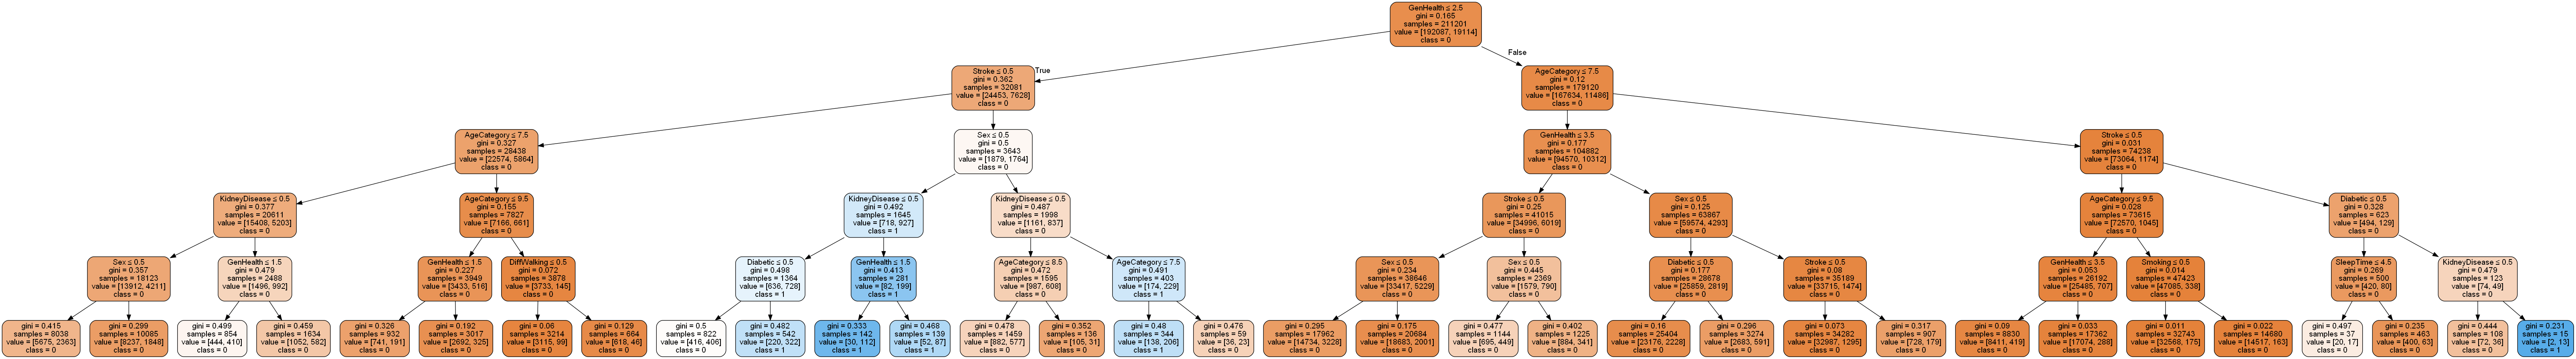

In [56]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data2 = StringIO()
export_graphviz(clf2, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols2,class_names=['0','1'])
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
graph2.write_png('diabetes222.png')
Image(graph2.create_png())